# Proyecto minería de datos MyAnimeList

**Autores** Fernando Martínez, Luz Pichintines y Camila Muñoz
**Fecha** 29 de Junio, 2022

# Motivación y problemática

Hoy en día la comunidad del anime en Chile ha crecido notablemente, por ello las empresas de series de televisión están interesadas en estas series originarias de Japón, para así abarcar el mercado del anime. Pero, ¿cómo saben ellos qué series tener en su repertorio?, como cada vez están saliendo más series de anime, el mercado está algo competitivo y puede llegar a crear un dilema a la hora de escoger una serie para ver, destacando que hay demasiadas categorías para clasificarlas.

A pesar de lo masivo que puede verse el consumo de anime en Chile, su inicio fue bastante tímido, ya que, no existía la posibilidad de acceder a mucho contenido proveniente de Japón. Luis Perilla, antropólogo, en su investigación llamada Otakus en Chile (2009), detalla cómo fueron los orígenes: “Se origina en los años 70 con la proliferación de series de dibujos animados japoneses en Chile (Tales como Candy, Mazinger Z, Marco, entre otras)k, continuadas por los más recientes éxitos televisivos (Sailon Moon, Dragon ball Z, Caballeros del Zodiaco, Pokemon, Samurai X, entre otros)”.

El streaming explotó en 2020 y la competencia entre los gigantes por el negocio es total, en todo el mundo se vio un auge importante durante la pandemia de la televisión de pago y ha crecido como la espuma en los últimos años. Sabemos que cada vez hay más opciones donde escoger, por eso una de la plataformas de streaming Funimation, siendo una empresa estadounidense que se especializa en la distribución de contenido extranjero, en particular en el anime, nos solicitó un estudio preliminar para que su nuevo equipo encargado de la categoría (anime) que desean lanzar prontamente pueda decidir qué series nuevas de anime pueden tener en cuenta para añadir a su plataforma,su objetivo es atraer a más audiencia, por ello, decidimos aceptar la propuesta y ayudar a la empresa a cumplir su meta. Nuestra motivación para realizar este trabajo es

Decidimos empezar con una exploración de los datos que nos ayudará a hacer un primer acercamiento con el dataset que trabajaremos a lo largo de este estudio, para conocer sus variables, tipo de datos, si hay variables que aportan información relevante para la problemática a resolver y finalmente vamos a dejar planteado unas preguntas que nos dará la idea de cómo manejar los datos que tenemos y definir la línea de trabajo que tomaremos.

Nuestra motivación es crear una aplicación que pueda recomendar series, documentales y películas de cualquier tipo automáticamente, basándose en las características que elijan los usuarios. Por esto, queremos realizar este análisis de datos y esperar a realizar un trabajo útil, para implementarlo en nuestro propio proyecto.

# Selección del dataset y preprocesamiento de datos

Se realiza un preprocesamiento de los datos con el fin de prepararlo para aplicar técnicas de exploración y el modelo predictivo.

Cargarmos las librerías y el dataset.

In [410]:
# Importamos las librerías necesarias para realizar esta exploración
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import plotly.express as px

# Creamos un dataframe de variable df al cual le asignamos la función que lee nuestro csv y lo mostramos.
df = pd.read_csv("https://gitlab.com/f.martinez09/proyecto-mal/-/raw/master/data/AnimeList.csv", sep=",")
df.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


In [411]:
# Realizamos una consulta a la dimensionalidad del dataset.
df.shape

(14478, 31)

In [412]:
# Realizamos una consulta a los nombres de los atributos.
df.columns

Index(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme'],
      dtype='object')

In [413]:
# Verificamos el contenido del dataset en una fila cualquiera, en este caso la 7000.
df.loc[7000]

anime_id                                                      32772
title                                        Puzzle & Dragons Cross
title_english                                    Puzzle & Dragons X
title_japanese                                              パズドラクロス
title_synonyms                                       PazuDora Cross
image_url         https://myanimelist.cdn-dena.com/images/anime/...
type                                                             TV
source                                                         Game
episodes                                                         89
status                                              Finished Airing
airing                                                        False
aired_string                            Jul 4, 2016 to Mar 26, 2018
aired                    {'from': '2016-07-04', 'to': '2018-03-26'}
duration                                            24 min. per ep.
rating                                    PG-13 

In [414]:
# Visualizamos qué tipo de variables posee el dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14478 entries, 0 to 14477
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        14478 non-null  int64  
 1   title           14478 non-null  object 
 2   title_english   5724 non-null   object 
 3   title_japanese  14443 non-null  object 
 4   title_synonyms  8937 non-null   object 
 5   image_url       14382 non-null  object 
 6   type            14478 non-null  object 
 7   source          14478 non-null  object 
 8   episodes        14478 non-null  int64  
 9   status          14478 non-null  object 
 10  airing          14478 non-null  bool   
 11  aired_string    14478 non-null  object 
 12  aired           14478 non-null  object 
 13  duration        14478 non-null  object 
 14  rating          14478 non-null  object 
 15  score           14478 non-null  float64
 16  scored_by       14478 non-null  int64  
 17  rank            12904 non-null 

Tenemos en total 31 atributos, para ayudarnos realizamos un diccionario para saber qué variables son de interés.

**Diccionario**

- anime_id: identificador del anime
- title: título del anime
- title_english: título del anime en inglés
- title_japanese: título del anime en japonés
- title_synonyms: título del anime con sinonimos
- image_url: dirección url de la imagen de la portada del anime
- type: tipo; puede ser tv, ova, movie.
- source: fuente; puede ser original, manga, music, book
- episodes: cantidad de episodios
- status: si continúa en emisión
- airing: booleano que indica si el anime está en emisión o no
- aired_string
- aired: fechas de emisión
- duration: duración del anime
- rating: calificación de edad
- score: puntuación
- scored_by
- rank: ranking
- popularity: popularidad
- members: cantidad de seguidores
- favorites: cantidad de favoritos
- background
- premiered
- broadcast
- related
- producer
- licensor
- studio
- genre: géneros
- opening_theme
- ending_theme

# Análisis exploratorio de datos

Teniendo preparado nuestro dataset y ya habiendo escogido los atributos de valor, procedemos a realizar una exploración para comprender su naturaleza y extraer información.
Luego, transformaremos los datos y plantearemos una meta de predicción.

Los atributos de interés son
- type
- source
- episodes
- airing
- duration
- score
- rank
- popularity
- genre

Creamos un dataset nuevo con estos atributos.

In [415]:
features = ["type","source","episodes","airing","duration","score","rank","popularity","genre"]
df_X = df[features]
df_X.head()

,type,source,episodes,airing,duration,score,rank,popularity,genre
0,TV,Manga,12,False,24 min. per ep.,7.63,1274.0,231,"Comedy, Supernatural, Romance, Shounen"
1,TV,Manga,26,False,24 min. per ep.,7.89,727.0,366,"Comedy, Parody, Romance, School, Shounen"
2,TV,Manga,51,False,24 min. per ep.,7.55,1508.0,1173,"Comedy, Magic, School, Shoujo"
3,TV,Original,38,False,16 min. per ep.,8.21,307.0,916,"Comedy, Drama, Magic, Romance, Fantasy"
4,TV,Manga,25,False,24 min. per ep.,8.67,50.0,426,"Comedy, Drama, Romance, Shounen"


In [416]:
df_X.shape

(14478, 9)

In [417]:
df_X = df_X.dropna()
df_X.shape

(12848, 9)

In [418]:
df_X = df_X[df_X.duration != "Unknown"]
df_X.shape

(12724, 9)

In [419]:
df_X = df_X[df_X.type != "Unknown"]
df_X.shape

(12724, 9)

La dimensionalidad se redujo a 9 atributos, como era de esperarse. Realizando la limpieza de valores nulos la cantidad resultante de filas se redujo a 12.724. Teniendo esto, procedemos a hacer una exploración visual de los datos.

**Type**

<AxesSubplot:>

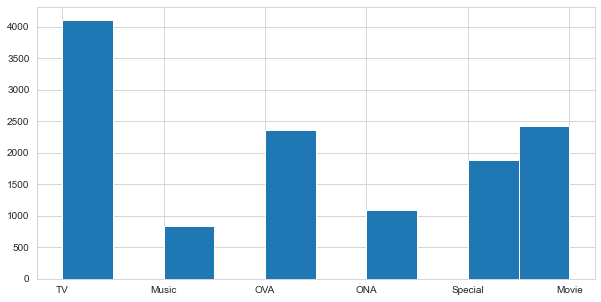

In [443]:
fig = plt.figure(figsize = (10, 5))
df_X['type'].hist()

Vemos que la mayor cantidad de animes vienen de origen TV.

**Source**

<AxesSubplot:xlabel='episodes', ylabel='popularity'>

<Figure size 720x360 with 0 Axes>

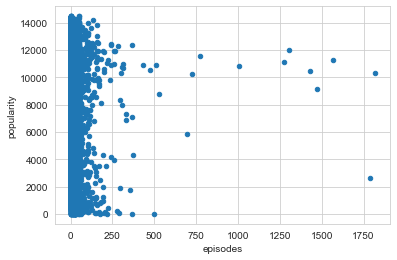

In [434]:
fig = plt.figure(figsize = (10, 5))
df_X.plot.scatter(x='episodes', y='popularity')

Los animes más populares se concentran entre 0 y 125 episodios.

**Score**

<AxesSubplot:>

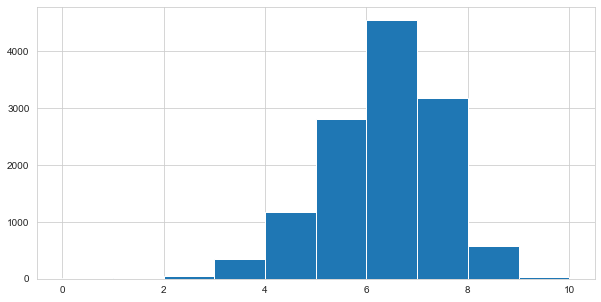

In [442]:
fig = plt.figure(figsize = (10, 5))
df_X['score'].hist()

La distribución del score o puntaje se agrupa entre los valores 5 y 7.

# Preguntas y problemas

Teniendo en cuenta los resultados anteriores es menester preguntarnos si podemos predecir algún atributo a partir de otros. Como por ejemplo si un nuevo anime será popular o tendrá mejor ranking en comparación a otros. Por lo que se establece como meta:
1. Predecir el ranking de un anime según su género, popularidad y cantidad de capitulos.
2. Clasificar el tipo segun la fuente y la cantidad de episodios

# Propuesta y aplicacion de la tecnica de mineria de datos

El primer problema planteado es de predicción o regresión numérico del ranking basado en género, popularidad y cantidad de capítulos.
Se implementará un modelo de clasificación supervisada.

En cuanto a los modelos que se probarán en el dataset, se optará por
- Árbol de decisión: Analiza atributos cualitativos y cuantitativos para lograr la clasificación.
- Clústering


## Pregunta 1 Tree Decision

**Calcular el ranking de un anime según su genero, popularidad y cantidad de capitulos**

In [396]:
from sklearn.tree import DecisionTreeClassifier
data_List=["genre","popularity","episodes","rank"]
data_question1= df[data_List]
data_question1.dropna(inplace=True)

C:\Users\rferm\AppData\Local\Temp\ipykernel_8996\4198901741.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [397]:
variable_objetiva= data_question1["rank"]
data_question1= data_question1.drop(columns=["rank"])

In [398]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline


from numpy import nan
genere_map = {}
genereList = []
for gener in data_question1["genre"]:
    if type(gener) != float:
        g = gener.split(',')
        for g1 in g:
            g1 = g1.strip().lower()
            if g1 in genere_map:
                genere_map[g1]+=1
            else:
                genere_map[g1] = 1

for gener in data_question1["genre"]:
    if type(gener) != float:
        g = gener.split(',')
        for g1 in g:
            g1 = g1.strip()
            if g1 not in genereList:
                genereList.append(g1)
print(len(genereList))

41


In [399]:
genre_dict={k: v for k, v in sorted(genere_map.items(), key=lambda item: item[1])}
genre_dict

pieLabels=["%s" % key for key in genre_dict]
pieValues=["%d" % genre_dict[key] for key in genre_dict]

for g in genereList:
      data_question1[g]=data_question1['genre'].apply(lambda x: (1 if g in x else 0) if type(x)!=float else 0 )
data_question1 = data_question1.drop(columns=['genre'])

In [400]:
data_question1

,popularity,episodes,Comedy,Supernatural,Romance,Shounen,Parody,School,Magic,Shoujo,...,Mecha,Psychological,Police,Vampire,Military,Thriller,Cars,Shoujo Ai,Dementia,Hentai
0,231,12,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,366,26,1,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1173,51,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,916,38,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,426,25,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14472,14204,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14473,13598,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14474,13284,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14476,14334,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [401]:
X= data_question1
y=variable_objetiva
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [402]:
# Define model
model = DecisionTreeRegressor()
# Fit model
model.fit(train_X, train_y)

val_predictions = model.predict(val_X)
MAE_DT = mean_absolute_error(val_y, val_predictions)

Model MAE:  1649.2433852140077
Profundidad del árbol: 54
Número de nodos terminales: 10256


"\nplot = plot_tree(\n            decision_tree = model,\n            feature_names = X.columns,\n            class_names   = 'MEDV',\n            filled        = True,\n            impurity      = False,\n            fontsize      = 10,\n            precision     = 2,\n            ax            = ax\n       )\n"

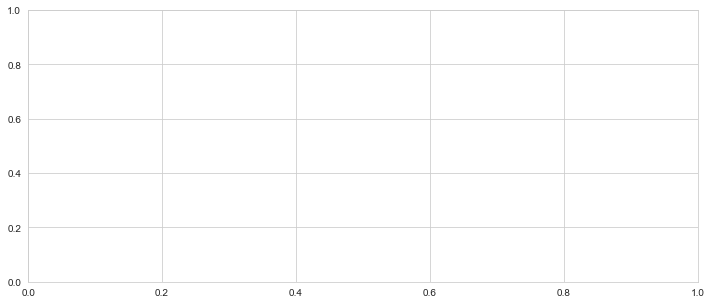

In [403]:
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree

print("Model MAE: ", mean_absolute_error(val_y, val_predictions))
#print(classification_report(val_y, val_predictions))

fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {model.get_depth()}")
print(f"Número de nodos terminales: {model.get_n_leaves()}")
"""
plot = plot_tree(
            decision_tree = model,
            feature_names = X.columns,
            class_names   = 'MEDV',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )
"""

In [404]:
results = pd.DataFrame({'Original': val_y, 'Predictions':val_predictions, 'difference': [abs(x1 - x2) for (x1, x2) in zip(val_y, val_predictions)]})
results

,Original,Predictions,difference
13122,367.0,274.0,93.0
9322,7050.0,8118.0,1068.0
12754,8552.0,6257.0,2295.0
1373,11005.0,9811.0,1194.0
9370,6946.0,3246.0,3700.0
...,...,...,...
13886,11397.0,11398.0,1.0
7352,12195.0,12608.0,413.0
8692,9373.0,6863.0,2510.0
908,2087.0,2371.0,284.0


## Pregunta 2 Clustering

In [405]:
df_feature=["type","source","episodes"]
data_question2=df[df_feature]
data_question2.dropna(inplace= True)
variable_objetiva2=data_question2["type"]

dummies2=pd.get_dummies(data_question2["source"])
data_question2=pd.concat([data_question2,dummies2],axis=1)
data_question2=data_question2.drop(columns=["source"])

data_question2.head()

C:\Users\rferm\AppData\Local\Temp\ipykernel_8996\3617224673.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,type,episodes,4-koma manga,Book,Card game,Digital manga,Game,Light novel,Manga,Music,Novel,Original,Other,Picture book,Radio,Unknown,Visual novel,Web manga
0,TV,12,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,TV,26,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,TV,51,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,TV,38,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,TV,25,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [406]:
X2= data_question2
y2= variable_objetiva2

train_X2, val_X2, train_y2, val_y2 = train_test_split(X2, y2, test_size = 0.2, random_state = 0)

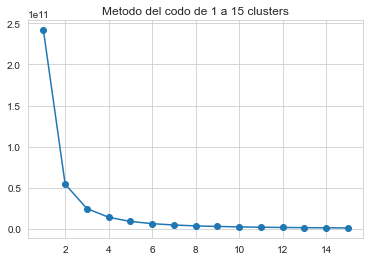

In [407]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse=[]

clusters=list(range(1,16))
for k in clusters:
    kmeans = KMeans(n_clusters=k).fit(X)
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, marker="o")
plt.title("Metodo del codo de 1 a 15 clusters")
plt.grid(True)
plt.show()

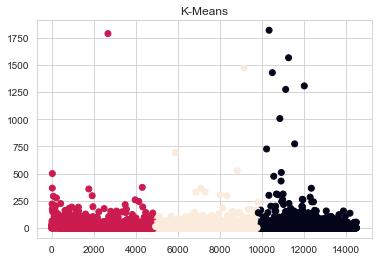

In [408]:
random_state = 20
kmeans = KMeans(n_clusters=3, random_state=random_state).fit(X)


plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_)
plt.title("K-Means")
plt.show()

# Conclusiones

Como es un proyecto que tuvo 3 etapas, al comienzo decidimos optar por el dataset myanimelist, ya que, es un tema que los tres lo manejamos relativamente bien, en cuanto a vocabulario y series. Al ir avanzando en la exploración de los datos estuvimos un tanto perdidos el como trabajarlo, por lo que recurrimos a un compañero quien nosotros consideramos que es un experto en este tema, teniendo conversaciones para aclarar el caso del cómo poder trabarlo, llegando así a la conclusión de trabajarlo con árbol de decisión y realizar clustering

# Contribuciones

- Fernando Martínez: Exploración de datos y aplicación de técnica.
- Luz Pichintines: Motivación y preguntas.
- Camila Muñoz: Propuesta experimental y aplicación de técnica.

# Referencias

Datos, E. M. D. L. (2021, 17 enero). Técnicas para codificar las variables categóricas (I): codificación ordinal y one-hot. El mundo de los datos. https://elmundodelosdatos.com/tecnicas-para-codificar-variables-categoricas-ordinal-one-hot/

Joshi, S. (2022). Función Pandas DataFrame DataFrame.boxplot(). Retrieved 30 June 2022, from https://www.delftstack.com/es/api/python-pandas/pandas-dataframe-dataframe.boxplot-function/
Delft Stack

### Repositorio
https://gitlab.com/f.martinez09/proyecto-mal